Task 3: Feature Scaling and Normalization 

● Demonstrate the effect of standardizing features using 
StandardScaler. 

● Compare model performance before and after scaling. 


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data ,columns = data.feature_names)
y = data.target

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#Train Model without scaling
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred_1 = model1.predict(x_test)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print("Before Scaling")
print("Accuracy Score :",accuracy_score(y_test,y_pred_1))
print("Classification_Report :")
print(classification_report(y_test,y_pred_1))

Before Scaling
Accuracy Score : 0.956140350877193
Classification_Report :
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [11]:
#Train Model after scaling
model2 = LogisticRegression()
model2.fit(x_train_scaled,y_train)
y_pred_2 = model2.predict(x_test_scaled)

In [13]:
print("After Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

After Scaling:
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Conclusion
StandardScaler transforms features to have 0 mean and unit variance.

Scaling helps especially for algorithms like Logistic Regression, SVM, KNN, etc.

In this example, model accuracy and classification performance improved after scaling.

Task 4: Model Interpretation 

● Write Python code to: 
○ Show the correlation matrix using a heatmap. 

○ Identify which features have the strongest relationship with 
the target. 

○ Discuss multicollinearity and how it might affect regression.

In [15]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [16]:
# Combine X and y for correlation
df = pd.concat([X, y], axis=1)

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

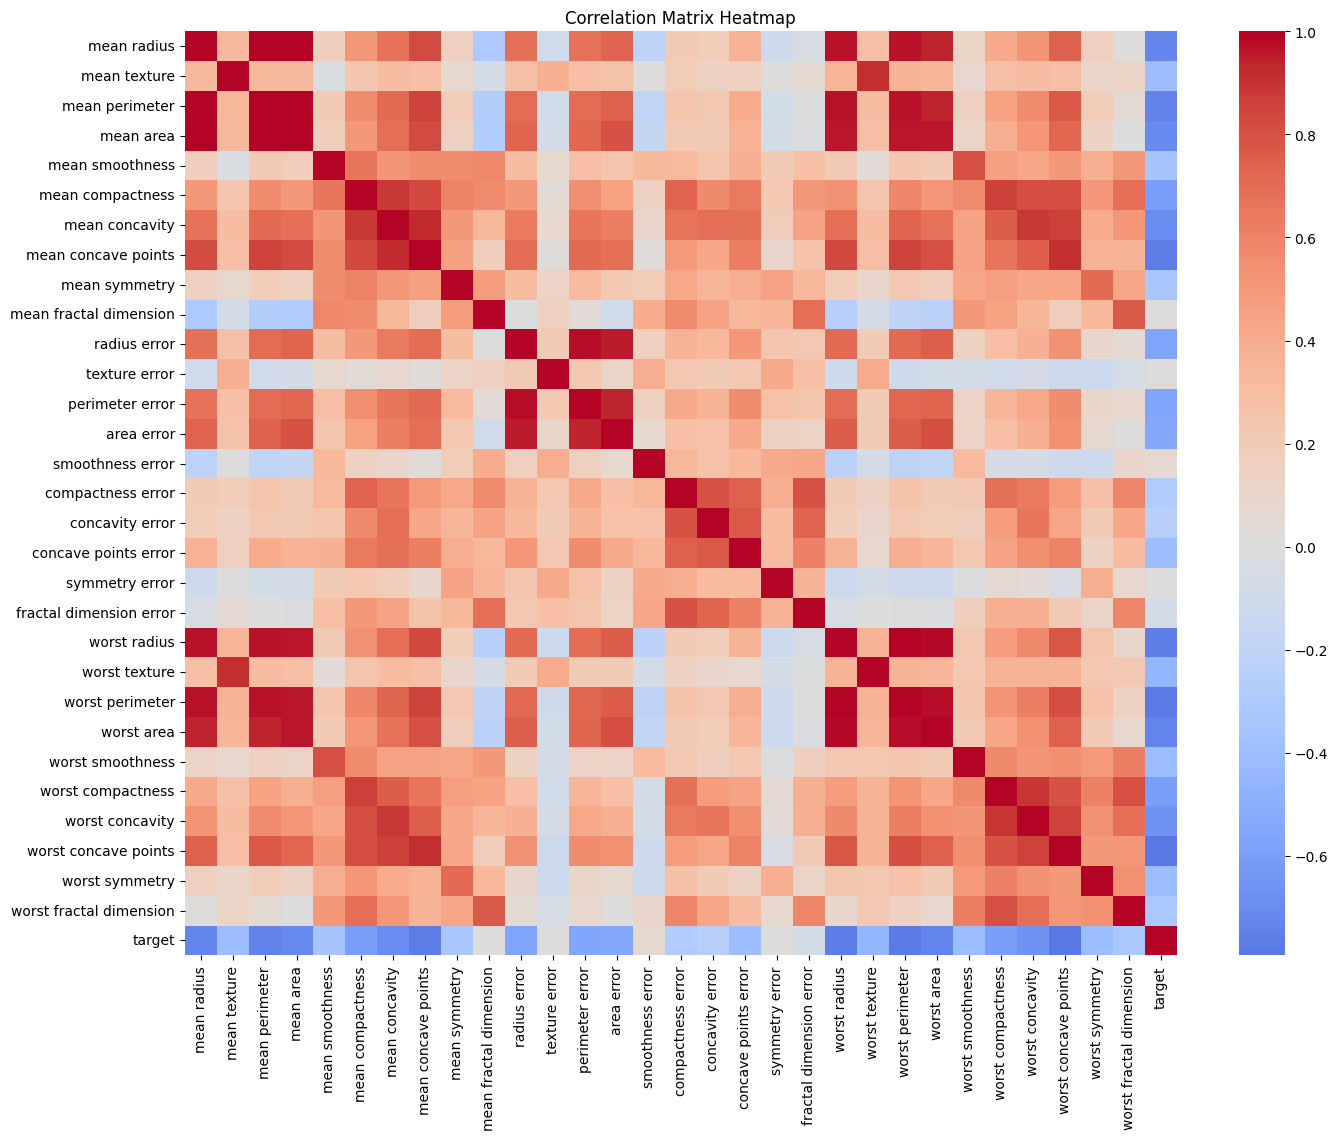

In [22]:
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [23]:
# Correlation of each feature with the target
target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)

# Display top 5 positively and negatively correlated features
print("Top 5 positively correlated features with target:")
print(target_corr.head(5), "\n")

print("Top 5 negatively correlated features with target:")
print(target_corr.tail(5))

Top 5 positively correlated features with target:
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
Name: target, dtype: float64 

Top 5 negatively correlated features with target:
mean perimeter         -0.742636
worst radius           -0.776454
mean concave points    -0.776614
worst perimeter        -0.782914
worst concave points   -0.793566
Name: target, dtype: float64


In [24]:
# Check high correlation between features (absolute correlation > 0.9)
high_corr_features = []

for col in X.columns:
    for idx in X.columns:
        if col != idx and abs(corr_matrix.loc[col, idx]) > 0.9:
            high_corr_features.append((col, idx, corr_matrix.loc[col, idx]))

print("\nHighly correlated feature pairs (possible multicollinearity):")
for pair in high_corr_features:
    print(f"{pair[0]} & {pair[1]} => Correlation: {pair[2]:.2f}")


Highly correlated feature pairs (possible multicollinearity):
mean radius & mean perimeter => Correlation: 1.00
mean radius & mean area => Correlation: 0.99
mean radius & worst radius => Correlation: 0.97
mean radius & worst perimeter => Correlation: 0.97
mean radius & worst area => Correlation: 0.94
mean texture & worst texture => Correlation: 0.91
mean perimeter & mean radius => Correlation: 1.00
mean perimeter & mean area => Correlation: 0.99
mean perimeter & worst radius => Correlation: 0.97
mean perimeter & worst perimeter => Correlation: 0.97
mean perimeter & worst area => Correlation: 0.94
mean area & mean radius => Correlation: 0.99
mean area & mean perimeter => Correlation: 0.99
mean area & worst radius => Correlation: 0.96
mean area & worst perimeter => Correlation: 0.96
mean area & worst area => Correlation: 0.96
mean concavity & mean concave points => Correlation: 0.92
mean concave points & mean concavity => Correlation: 0.92
mean concave points & worst concave points => C

Multicollinearity
Multicollinearity occurs when two or more input features are highly correlated.

It can cause:

Unstable coefficients in regression models.

Difficulty in interpreting feature importance.

Overfitting in some models.

Solutions:

Drop one of the correlated features.

Use PCA or regularization (e.g., Ridge or Lasso regression).